# (Data Visualization: Ford Go Bike 2017)
## by Hadeel Altamimi

## Preliminary Wrangling

> The data set contains information about bicycles rides provided by Bay Area Motivate from the Bay Wheels bicycle sharing service. The service motivate is committed to supporting bicycling as an alternative transportation option.
><br><br>The data are available at https://s3.amazonaws.com/fordgobike-data/index.html

> The dataset contains the following features:
Trip Duration (seconds)<br>
Start Time and Date<br>
End Time and Date<br>
Start Station ID<br>
Start Station Name<br>
Start Station Latitude<br>
Start Station Longitude<br>
End Station ID<br>
End Station Name<br>
End Station Latitude<br>
End Station Longitude<br>
Bike ID<br>
User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)<br>
User Birth Year<br>
User Gender


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import datetime 
import calendar 

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

## Data Gathering

In [2]:
ford = pd.read_csv('C:/Users/ghaid/Desktop/Project Template/2017-fordgobike-tripdata.csv')


## Data Assessing

In [3]:
ford.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [4]:
ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
 13  member_birth_year        453159 non-null  float64
 14  memb

In [5]:
ford.shape

(519700, 15)

In [6]:
ford.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id               0
start_station_name             0
start_station_latitude         0
start_station_longitude        0
end_station_id                 0
end_station_name               0
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
member_birth_year          66541
member_gender              66462
dtype: int64

## Data Cleaning

In [7]:
df1=ford.copy()

In [8]:
# Drop Null values
df1.dropna(subset = ["member_birth_year","member_gender"], inplace=True)
df1.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
dtype: int64

In [9]:
#Change the birth year from float to int
df1["member_birth_year"]=df1["member_birth_year"].astype(int)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453159 entries, 0 to 519699
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             453159 non-null  int64  
 1   start_time               453159 non-null  object 
 2   end_time                 453159 non-null  object 
 3   start_station_id         453159 non-null  int64  
 4   start_station_name       453159 non-null  object 
 5   start_station_latitude   453159 non-null  float64
 6   start_station_longitude  453159 non-null  float64
 7   end_station_id           453159 non-null  int64  
 8   end_station_name         453159 non-null  object 
 9   end_station_latitude     453159 non-null  float64
 10  end_station_longitude    453159 non-null  float64
 11  bike_id                  453159 non-null  int64  
 12  user_type                453159 non-null  object 
 13  member_birth_year        453159 non-null  int32  
 14  memb

In [10]:
# Create a column for age which be derived from the birth year
df1['age'] = 2017-df1['member_birth_year']

In [11]:
df1.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,age
count,453159.000000,453159.000000,453159.000000,453159.000000,453159.000000,453159.000000,453159.000000,453159.000000,453159.000000,453159.000000
mean,832.934014,95.046132,37.771968,-122.364093,91.854907,37.772090,-122.363274,1680.628285,1980.404787,36.595213
std,2525.280717,84.578497,0.084914,0.104240,83.053529,0.084811,0.103723,972.828314,10.513488,10.513488
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000,1886.000000,18.000000
25%,364.000000,25.000000,37.773492,-122.411726,24.000000,37.773793,-122.409851,795.000000,1974.000000,29.000000
50%,556.000000,67.000000,37.782411,-122.398525,66.000000,37.782411,-122.397405,1739.000000,1983.000000,34.000000
75%,838.000000,138.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2530.000000,1988.000000,43.000000
max,86252.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000,1999.000000,131.000000


In [12]:
#There are incorrect age, the maximum age 131 which is not accepted
# I will filter the ages and keeps the ages equal or less than 60
df1=df1[df1['age'] <= 60]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441267 entries, 0 to 519699
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             441267 non-null  int64  
 1   start_time               441267 non-null  object 
 2   end_time                 441267 non-null  object 
 3   start_station_id         441267 non-null  int64  
 4   start_station_name       441267 non-null  object 
 5   start_station_latitude   441267 non-null  float64
 6   start_station_longitude  441267 non-null  float64
 7   end_station_id           441267 non-null  int64  
 8   end_station_name         441267 non-null  object 
 9   end_station_latitude     441267 non-null  float64
 10  end_station_longitude    441267 non-null  float64
 11  bike_id                  441267 non-null  int64  
 12  user_type                441267 non-null  object 
 13  member_birth_year        441267 non-null  int32  
 14  memb

In [13]:
# Drop unwanted columns

df1.drop(['start_time','end_time','start_station_id','start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id','end_station_name','end_station_latitude','end_station_longitude','bike_id'], axis=1, inplace=True, errors='ignore')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441267 entries, 0 to 519699
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   duration_sec       441267 non-null  int64 
 1   user_type          441267 non-null  object
 2   member_birth_year  441267 non-null  int32 
 3   member_gender      441267 non-null  object
 4   age                441267 non-null  int32 
dtypes: int32(2), int64(1), object(2)
memory usage: 16.8+ MB


In [14]:
df1.shape

(441267, 5)

### What is the structure of your dataset? 

> The dataset consist of 15 culomns and 519700 rows, and after cleaning it consisted 5 columns and 441267.The data types of the columns are: int32(2), int64(1), object(2).

### What is/are the main feature(s) of interest in your dataset? 

> I will focus on the features related to the riders charastarastics such as gender and type.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> After the cleaning, the features i think it will be helpful are gender, user type, age, and duaration.

## Univariate Exploration

### 1-The major gender that uses the service

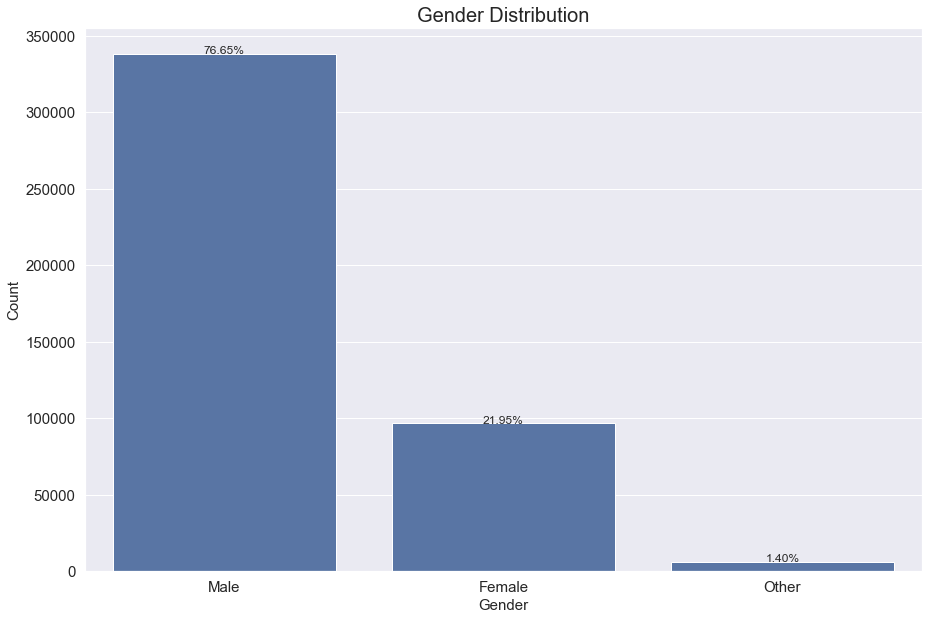

In [16]:
#I am going to use the bar plot since it is suitable for qualtative data

#Chart order and color
base_color = sb.color_palette()[0]
cat_order = df1['member_gender'].value_counts().index

#plot
ax = sb.countplot(x="member_gender", data=df1, color = base_color, order = cat_order)



# To change the size of the image and text, and add labeles
sb.set(rc={'figure.figsize': (20,15)})
ax.axes.set_title("Gender Distribution",fontsize=20)
ax.set_xlabel("Gender",fontsize=15)
ax.set_ylabel("Count",fontsize=15)
ax.tick_params(labelsize=15)

# To display the percentage
# https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn
total=float(len(df1))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(100*height/total),
            ha="center") 

The males represents more than half of the service users, then the female and the others.

### 2- The major user type

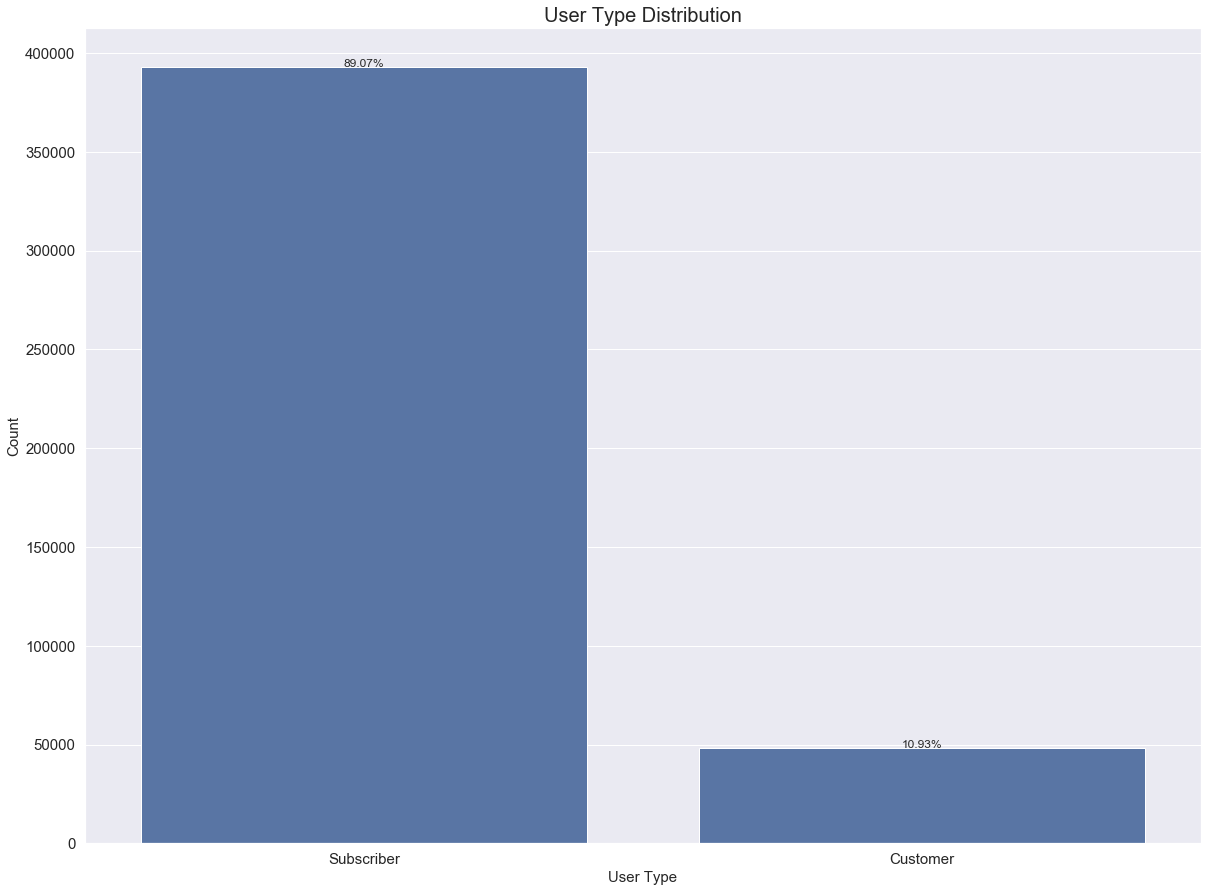

In [17]:
#I am going to use the bar plot since it is suitable for qualtative data

#Chart order and color
base_color = sb.color_palette()[0]
cat_order = df1['user_type'].value_counts().index

#Plot
ax = sb.countplot(x="user_type", data=df1, color = base_color, order = cat_order)



# To change the size of the image and text, and add labeles

sb.set(rc={'figure.figsize': (9,8)})
ax.axes.set_title("User Type Distribution",fontsize=20)
ax.set_xlabel("User Type",fontsize=15)
ax.set_ylabel("Count",fontsize=15)
ax.tick_params(labelsize=15)

# To display the percentage

total=float(len(df1))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(100*height/total),
            ha="center") 

More than the half of the service users are subscribers

### 3-How the age is distributed?

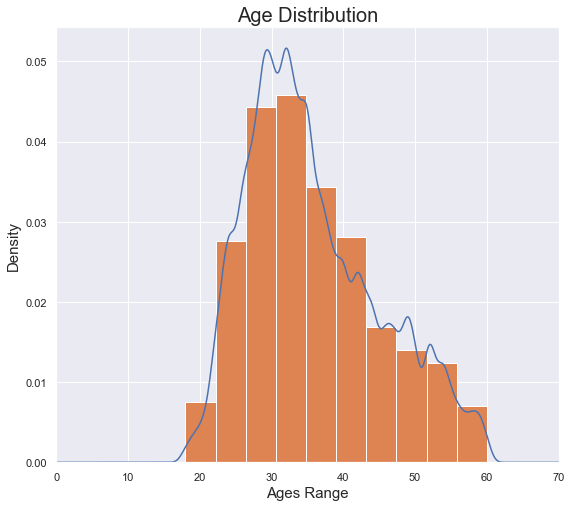

In [53]:
# I am going to use the Density graph associated with histogram since they are suitable for quantative data

ax=df1["age"].plot.kde() 
ax=df1["age"].plot.hist(density=True)
ax.axes.set_title("Age Distribution",fontsize=20)
ax.set_xlabel("Ages Range",fontsize=15)
ax.set_ylabel("Density",fontsize=15)

plt.xlim((0,70));

It seems that the age is heavely distributed between 25 to 45

### 4-How the durations are distributed?

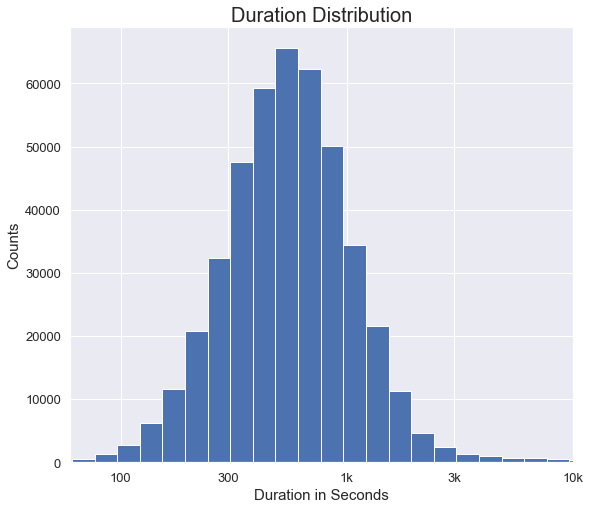

In [19]:
# I am going to use the histogram since it is suitable for quantative data

#Bins
bins = 10 ** np.arange(np.log10(df1['duration_sec'].min()), np.log10(df1['duration_sec'].max()) + 0.1, 0.1)

#Plot
ax=plt.hist(data = df1, x = 'duration_sec', bins = bins)
plt.title('Duration Distribution',fontsize=20)
plt.xlabel('Duration in Seconds',fontsize=15);
plt.ylabel('Counts',fontsize=15);

#Scale the graph
plt.xscale('log')
plt.xlim((60,10000))

#Change the ticks
plt.xticks([1e2,3e2,1e3,3e3,1e4], [100,300,'1k', '3k','10k'])
plt.tick_params(labelsize=13)


From the graph we can see that the duration rates are heavily distributed between 300 and 1000 seconds.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The major users whom use the service are males. Also, most of the users are subscribers.<br>
There were no unusual point and i didnt need to perform any transfromation.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> While data cleaning, i dropped the nan values in the gender and the birth year. After that i extracted the age by extracting the birth year from the year of the data set and i noticed unusual age (131) so i decided to keep only the ages that are equal or less than 60. For the duration, i have scaled the graph using the log scale and i also set a limit for the graph to make it more clear.

## Bivariate Exploration

### 1-Duaration vs Gender

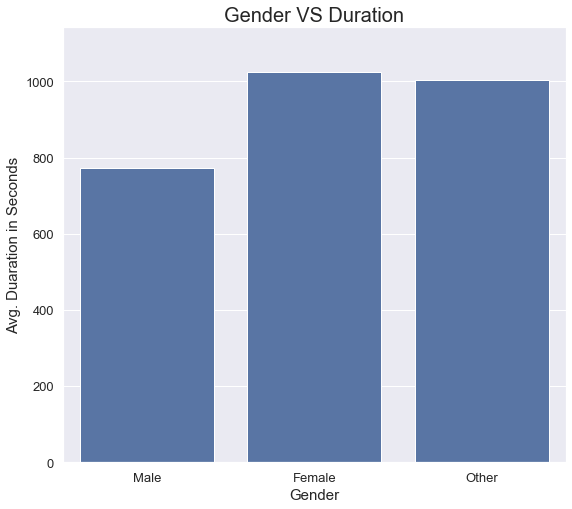

In [20]:
# For quantative and qualtative data the violin and box plot are the most suitable, but i am going to use the bar plot since it is easier in the summary reading

#Plot
sb.barplot(data = df1, x = 'member_gender', y = 'duration_sec', color = base_color, errwidth=0)


# Lables
plt.title('Gender VS Duration',fontsize=20)
plt.xlabel('Gender',fontsize=15)
plt.ylabel('Avg. Duaration in Seconds',fontsize=15)
plt.tick_params(labelsize=13)

Even though the male represent the major users, but females and others have a higher duration average than the males.

### 2-Duration vs User Type

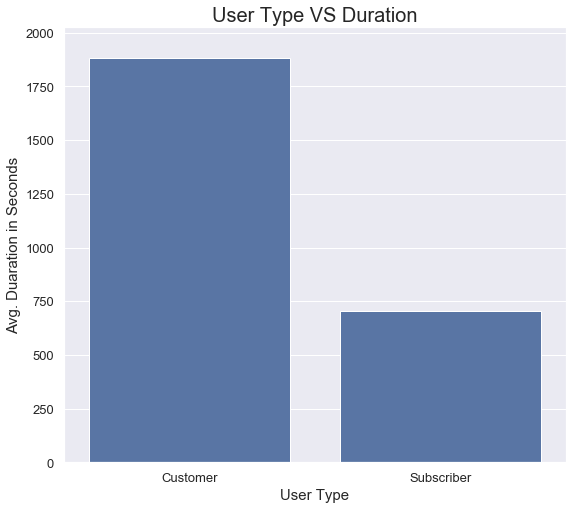

In [21]:
# For quantative and qualtative data the violin and box plot are the most suitable, but i am going to use the bar plot since it easier to read the summary

#Plot
sb.barplot(data = df1, x = 'user_type', y = 'duration_sec', color = base_color, errwidth=0)

#lables
plt.title('User Type VS Duration',fontsize=20)
plt.xlabel('User Type',fontsize=15)
plt.ylabel('Avg. Duaration in Seconds',fontsize=15)
plt.tick_params(labelsize=13)

From the graph above, we can see that the customers has higher duration average than the subscribers, even though the subscribers represent most of our users.

### 3- User Type Vs Gender Count

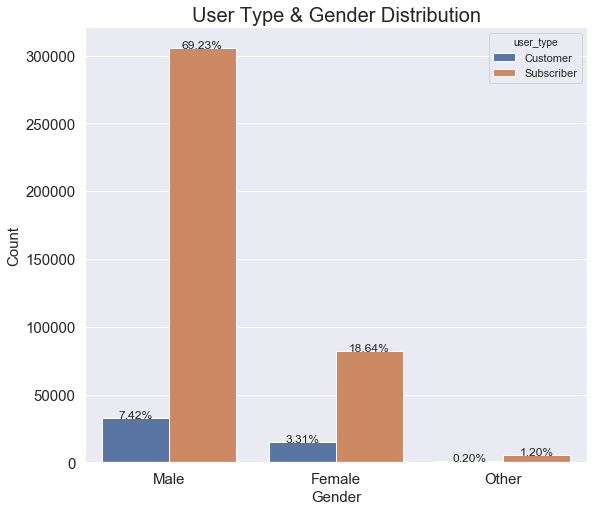

In [22]:
# i am going to use the bar plot since it easier to read the summary

# plot
ax=sb.countplot(data = df1, x = 'member_gender', hue = 'user_type')

# Labels
ax.axes.set_title("User Type & Gender Distribution",fontsize=20)
ax.set_xlabel("Gender",fontsize=15)
ax.set_ylabel("Count",fontsize=15)
ax.tick_params(labelsize=15)

#Percentage
total=float(len(df1))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(100*height/total),
            ha="center") 

The subscribers number is always higher than the customers number for all different genders, and the male subscribers represnt more than half of the service users.

### 4-Duration vs Age

([<matplotlib.axis.YTick at 0x2a210840708>,
 <a list of 5 Text yticklabel objects>)

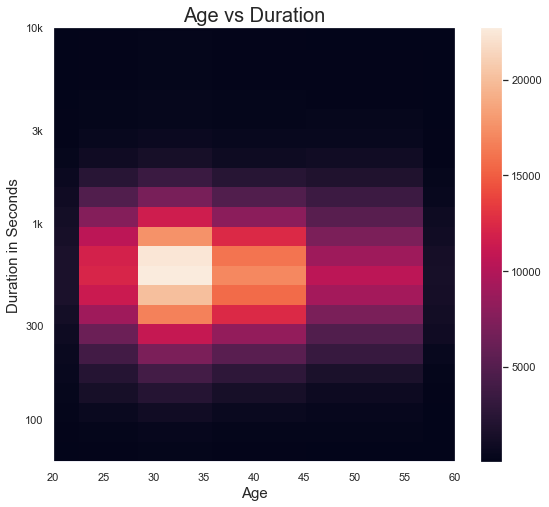

In [25]:
#Since we have a large amount of data, ill wil be using the heat map since it has a higher transparancy than the scatter plot

# prepare the bins
bins_x = 10 ** np.arange(np.log10(df1['age'].min()), np.log10(df1['age'].max())+0.1, 0.1)
bins_y = 10 ** np.arange(np.log10(df1['duration_sec'].min()), np.log10(df1['duration_sec'].max())+0.1, 0.1)

# plot
plt.hist2d(data = df1, x = 'age', y = 'duration_sec',
           bins = [bins_x, bins_y], cmin=0.5)
plt.colorbar()


# plot information
plt.title('Age vs Duration',fontsize=20)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Duration in Seconds',fontsize=15)



#Scale and adjust the chart
plt.yscale('log')
plt.xlim((20,60))
plt.ylim((60,10000))

#Change the ticks
plt.yticks([1e2,3e2,1e3,3e3,1e4], [100, 300,'1k','3k', '10k'])


From the graph above, we can see the majority of users are between 30 and 35 and their duration is between 500 and 600

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The females and others have a higher duration average than the males<br>
The customers have a higher duration rate than the subscribers<br>
The male subscribers represnt more than half of the service users.<br>

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I observed that younger people (25- 45) tend to have a higher duration rate than the older people.

## Multivariate Exploration

### 1-User Type vs Duration Vs Age

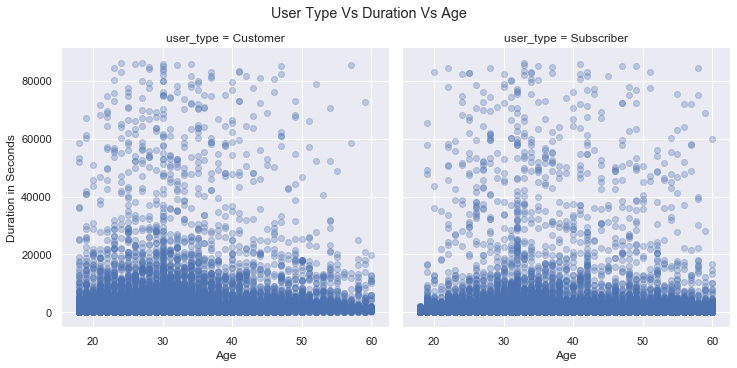

In [42]:
g= sb.FacetGrid(data = df1, col = 'user_type', height=5.2,aspect=1,margin_titles = True)
g.map(plt.scatter, 'age', 'duration_sec',alpha=0.30)

#Title
plt.subplots_adjust(top=0.87)
g.fig.suptitle('User Type Vs Duration Vs Age')

# Axes
g.set_xlabels('Age')
g.set_ylabels('Duration in Seconds')


from the graph, we noticed that the customers have a higher duration rates than the subscribers at different ages.

### 2- Gender vs Duration vs  Age

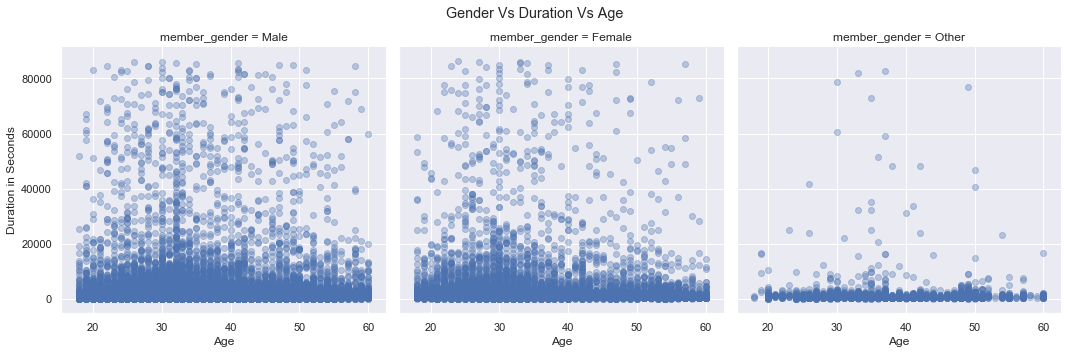

In [50]:
g= sb.FacetGrid(data = df1, col = 'member_gender', height=5,margin_titles = True)
g.map(plt.scatter, 'age', 'duration_sec',alpha=1/3)

#Title
plt.subplots_adjust(top=0.87)
g.fig.suptitle('Gender Vs Duration Vs Age')

# Axes
g.set_xlabels('Age')
g.set_ylabels('Duration in Seconds')


Males have higher duration rates, then the females, and at last the others.

### 3-The Average duration spent by differnt user types and genders

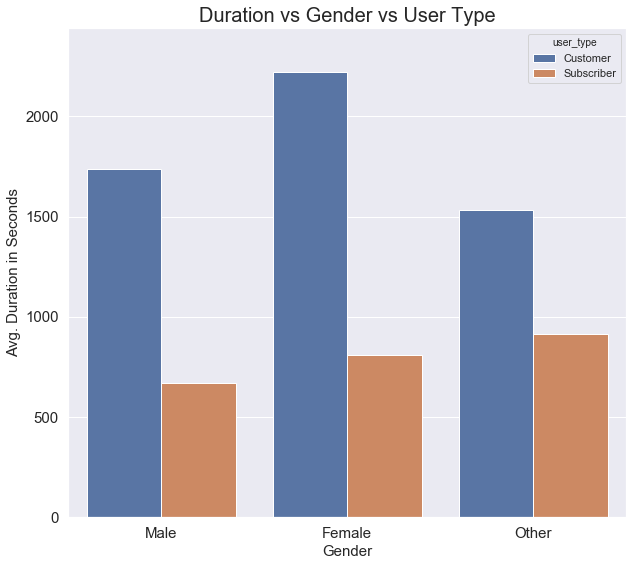

In [135]:
ax=sb.barplot(data = df2, x = 'member_gender', y='duration_sec', hue = 'user_type', errwidth=0)

ax.axes.set_title("Duration vs Gender vs User Type",fontsize=20)
ax.set_xlabel("Gender",fontsize=15)
ax.set_ylabel("Avg. Duration in Seconds",fontsize=15)
ax.tick_params(labelsize=15)


Though the number of customers is less than the subscribers, as well as well as the number of females and the others is less than the males. The females customers have the highest duration average.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>
- Males Have higher duration rates, but on average the females and the others has a higher duration.<br> 
- The females customers has the highest duration average <br>
- The customers have a higher duration average than the subscribers at different ages.<br>
- Younger people has higher duration rates compared to older people.

### Were there any interesting or surprising interactions between features?

> 
- Females customers having the highest duration average.